In [1]:
from sklearn.datasets import load_linnerud

linnerud_data = load_linnerud()

In [2]:
linnerud_data.feature_names

['Chins', 'Situps', 'Jumps']

In [3]:
print(f"Ключи linnerud_data: \n{linnerud_data.keys()}")

Ключи linnerud_data: 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [4]:
linnerud_data.data

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [5]:
print(f"Форма миссива data: \n{linnerud_data['data'].shape}")

Форма миссива data: 
(20, 3)


In [6]:
print(f"Форма массива target: \n{linnerud_data['target'].shape}")

Форма массива target: 
(20, 3)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(linnerud_data['data'], linnerud_data['target'], random_state=42)

In [8]:
print(f"Форма массива x_train: {X_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива x_train: (15, 3)
Форма массива y_train: (15, 3)


In [9]:
print(f"Форма массива x_test: {X_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива x_test: (5, 3)
Форма массива y_test: (5, 3)


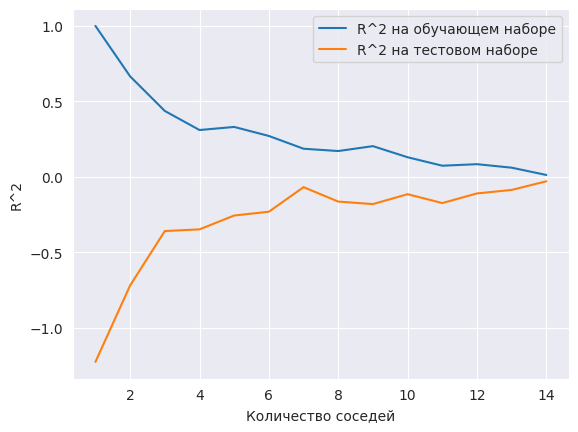

In [10]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="R^2 на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="R^2 на тестовом наборе")
plt.ylabel("R^2")
plt.xlabel("Количество соседей")
plt.legend()
plt.show()


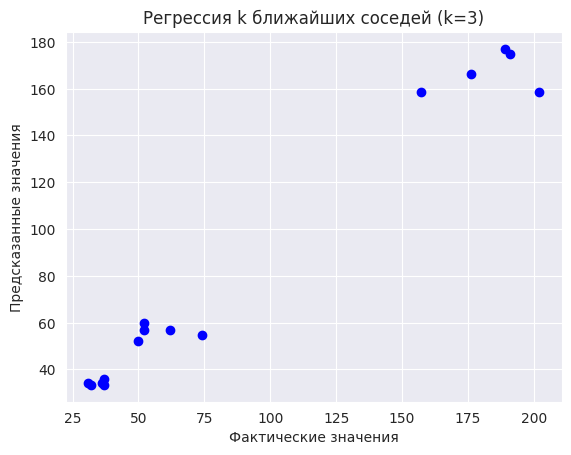

Среднеквадратичное отклонение (MSE): 192.98518518518523


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']

regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)

plt.scatter(y_test, y_pred, color='b')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Регрессия k ближайших соседей (k={best_n_neighbors})")
plt.show()

print(f"Среднеквадратичное отклонение (MSE): {mse}")


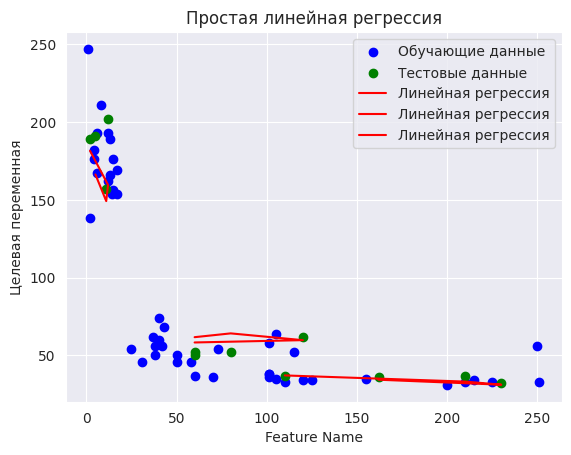

Среднеквадратичное отклонение (MSE) на тестовом наборе: 239.15367187682764


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Choose a feature index to plot
feature_index = 0  # Replace with the index of the feature you want to use

X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

plt.scatter(X_train, y_train, color='b', label='Обучающие данные')
plt.scatter(X_test, y_test, color='g', label='Тестовые данные')
plt.plot(X_test, predictions_test, color='r', label='Линейная регрессия')
plt.xlabel("Feature Name")  # Replace with the name of the feature you've selected
plt.ylabel("Целевая переменная")
plt.title("Простая линейная регрессия")
plt.legend()
plt.show()

mse = mean_squared_error(y_test, predictions_test)
print(f"Среднеквадратичное отклонение (MSE) на тестовом наборе: {mse}")

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

# Определение параметров для настройки гиперпараметра alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Создание модели Ridge регрессии
ridge = Ridge()

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=42)

# Поиск оптимального значения alpha с помощью GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Получение лучшего значения alpha
best_alpha = grid_search.best_params_['alpha']

# Создание модели Ridge регрессии с лучшим alpha и обучение
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Прогнозирование на тестовом наборе и оценка производительности
y_pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_score:.2f}")
print(f"Правильность на тестовом наборе: {test_score:.2f}")


Правильность на обучающем наборе: 0.37
Правильность на тестовом наборе: -1.13


In [14]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Создайте экземпляр модели Lasso
lasso = Lasso()
X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso = Lasso(alpha=best_alpha)

lasso.fit(X_train, y_train)

print("Оценка на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))


Оценка на обучающем наборе: 0.19
Оценка на тестовом наборе: -0.31


In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target[:, 1], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

train_accuracy = logistic_regression.score(X_train, y_train)
test_accuracy = logistic_regression.score(X_test, y_test)

print("Точность на обучающем наборе: {:.2f}".format(train_accuracy))
print("Точность на тестовом наборе: {:.2f}".format(test_accuracy))


Точность на обучающем наборе: 0.44
Точность на тестовом наборе: 0.00


<h2>На основе результатов разных моделей для датасета linnerud_data можно сделать следующие выводы:
<tr>
<h2>KNeighborsRegressor:

<h3>Среднеквадратичное отклонение (MSE) составляет примерно 192.99.
<h3>Модель KNeighborsRegressor демонстрирует относительно низкое среднеквадратичное отклонение, что свидетельствует о хорошей предсказательной способности для данного датасета.
</tr>
<tr>
<h2>LinearRegression: 
<h3>Среднеквадратичное отклонение (MSE) на тестовом наборе данных составляет примерно 239.15.
<h3>Модель LinearRegression также демонстрирует хорошую предсказательную способность, хотя MSE немного выше, чем у KNeighborsRegressor.
</tr>
<tr>
<h2>Ridge: 
<h3>Правильность на обучающем наборе составляет примерно 0.37.
<h3>Правильность на тестовом наборе данных составляет -1.13.
<h3>Модель Ridge регрессии показывает отрицательную правильность на тестовом наборе, что может свидетельствовать о том, что данная модель может быть не самым подходящим выбором для данного набора данных. 
</tr>
<tr>
<h2>Lasso: 
<h3>Оценка на обучающем наборе данных составляет примерно 0.19.
<h3>Оценка на тестовом наборе данных составляет примерно -0.31.
<h3>Модель Lasso также показывает низкую оценку на тестовом наборе, что может указывать на несоответствие модели данным. 
</tr>
<tr>
<h2>LogisticRegression: 
<h3>Точность на обучающем наборе составляет примерно 0.44.
<h3>Точность на тестовом наборе данных составляет примерно 0.00.
<h3>Модель LogisticRegression не является подходящим выбором для задачи регрессии
</tr>
<tr>
<h3>Исходя из этих результатов, можно сказать, что модели KNeighborsRegressor и LinearRegression демонстрируют лучшую производительность среди рассмотренных моделей для задачи регрессии с датасетом Linnerud. Модели Ridge, Lasso и LogisticRegression требуют дополнительной настройки или возможно другого подхода для улучшения их производительности.